In [1]:
import numpy as np

In [2]:
import skfuzzy as fuzz

In [3]:
from skfuzzy import control as ctrl

In [4]:
weather_conditions = ctrl.Antecedent(np.arange(0,101,1),'weather')
comfort_levels_temp = ctrl.Antecedent(np.arange(0,101,1),'temperature')
comfort_levels_humidity = ctrl.Antecedent(np.arange(0,101,1),'humidity')
hvac_actions = ctrl.Consequent(np.arange(0,101,1),'hvac_actions')

In [5]:
weather_conditions['sunny'] = fuzz.trimf(weather_conditions.universe, [0,0,33])
weather_conditions['cloudy'] = fuzz.trimf(weather_conditions.universe, [0,33,66])
weather_conditions['rainy'] = fuzz.trimf(weather_conditions.universe, [33,66,100])
weather_conditions['snowy'] = fuzz.trimf(weather_conditions.universe, [66,100,100])

C:\Users\Alberto\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


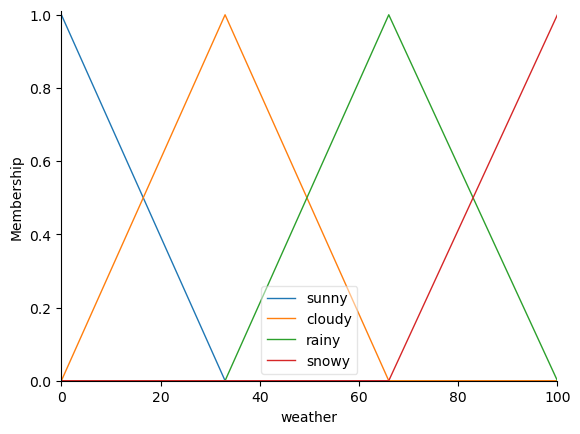

In [6]:
weather_conditions.view()

In [7]:
comfort_levels_temp['cold'] = fuzz.trimf(comfort_levels_temp.universe, [0,0,50])
comfort_levels_temp['warm'] = fuzz.trimf(comfort_levels_temp.universe, [0,50,100])
comfort_levels_temp['hot'] = fuzz.trimf(comfort_levels_temp.universe, [50,100,100])

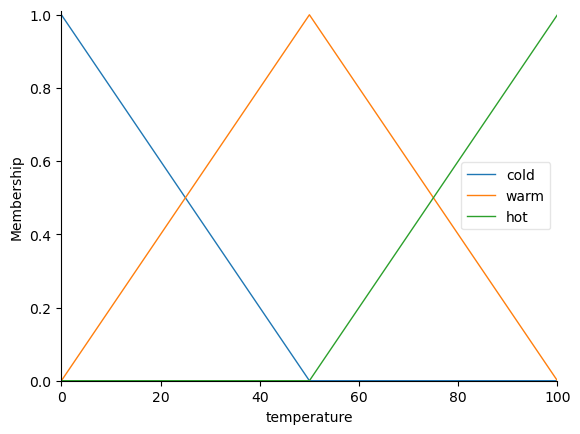

In [8]:
comfort_levels_temp.view()

In [9]:
comfort_levels_humidity['dry'] = fuzz.trimf(comfort_levels_humidity.universe, [0,0,50])
comfort_levels_humidity['comfortable'] = fuzz.trimf(comfort_levels_humidity.universe, [0,50,100])
comfort_levels_humidity['humid'] = fuzz.trimf(comfort_levels_humidity.universe, [50,100,100])

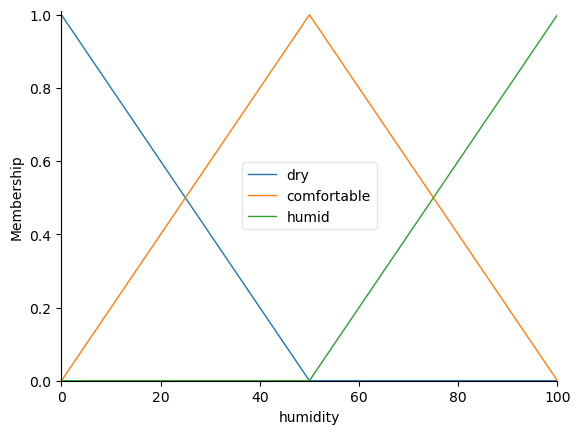

In [10]:
comfort_levels_humidity.view()

In [11]:
hvac_actions['heat'] = fuzz.trimf(hvac_actions.universe, [0,0,33])
hvac_actions['cool'] = fuzz.trimf(hvac_actions.universe, [0,33,66])
hvac_actions['dehumidify'] = fuzz.trimf(hvac_actions.universe, [33,66,100])
hvac_actions['humidify'] = fuzz.trimf(hvac_actions.universe, [66,100,100])

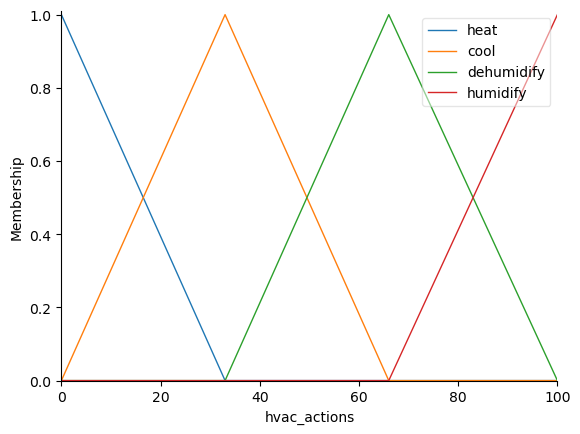

In [12]:
hvac_actions.view()

In [13]:
# I have considered the most likely scenarios. When it is sunny, it will be warm or hot, so we need to cool the room. If it is cool because
# it is winter, we adjust the humidity. In case it is cloudy, it will be cold or warm. If it is cold, we want to heat the room, but if it is
# warm, we will adjust the humidity (in general, when it is warm, we adjust the humidity). If it is rainy, it can be cold (we will heat the room)
# or warm (we will adjust the humidity). Finally, if it is snowy, it will be cold for sure, so we heat the room.

rule1 = ctrl.Rule(weather_conditions['sunny'] & (comfort_levels_temp['warm'] | comfort_levels_temp['hot']), hvac_actions['cool'])
rule2 = ctrl.Rule(weather_conditions['sunny'] & comfort_levels_temp['cold'] & comfort_levels_humidity['dry'], hvac_actions['humidify'])
rule3 = ctrl.Rule(weather_conditions['sunny'] & comfort_levels_temp['cold'] & comfort_levels_humidity['comfortable'], hvac_actions['heat'])
rule4 = ctrl.Rule(weather_conditions['sunny'] & comfort_levels_temp['cold'] & comfort_levels_humidity['humid'], hvac_actions['humidify'])
rule5 = ctrl.Rule(weather_conditions['cloudy'] & (comfort_levels_temp['warm'] | comfort_levels_temp['hot']), hvac_actions['cool'])
rule6 = ctrl.Rule(weather_conditions['cloudy'] & comfort_levels_temp['cold'] & comfort_levels_humidity['dry'], hvac_actions['humidify'])
rule7 = ctrl.Rule(weather_conditions['cloudy'] & comfort_levels_temp['cold'] & comfort_levels_humidity['comfortable'], hvac_actions['heat'])
rule8 = ctrl.Rule(weather_conditions['cloudy'] & comfort_levels_temp['cold'] & comfort_levels_humidity['humid'], hvac_actions['humidify'])
rule9 = ctrl.Rule(weather_conditions['rainy'] & comfort_levels_temp['warm'] & comfort_levels_humidity['humid'], hvac_actions['dehumidify'])
rule10 = ctrl.Rule(weather_conditions['rainy'] & comfort_levels_temp['cold'], hvac_actions['heat'])
rule11 = ctrl.Rule(weather_conditions['rainy'] & comfort_levels_temp['warm'] & comfort_levels_humidity['dry'], hvac_actions['humidify'])
rule12 = ctrl.Rule(weather_conditions['rainy'] & comfort_levels_temp['warm'] & comfort_levels_humidity['comfortable'], hvac_actions['dehumidify'])
rule13 = ctrl.Rule(weather_conditions['snowy'], hvac_actions['heat'])

In [14]:
climate_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])

In [15]:
climate_simulation = ctrl.ControlSystemSimulation(climate_ctrl)

In [16]:
climate_simulation.input['weather'] = 80

In [17]:
climate_simulation.input['temperature'] = 40

In [18]:
climate_simulation.input['humidity'] = 50

In [19]:
climate_simulation.compute()

In [20]:
print(climate_simulation.output['hvac_actions'])

51.567763781589136


In [21]:
import matplotlib.pyplot as plt

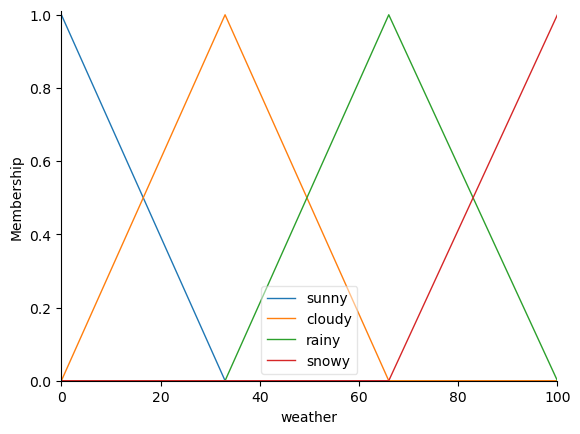

In [22]:
weather_conditions.view()

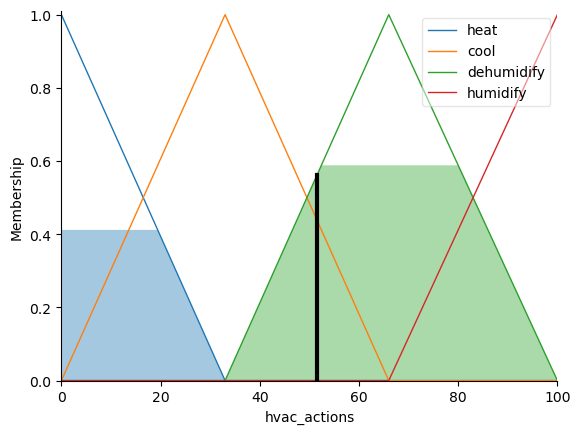

In [23]:
hvac_actions.view(sim=climate_simulation)